In [21]:
import pandas as pd
import numpy as np

# Relative path to the dataset
file_path_Alzheimer = "../../data/raw/ALZHEIMER_Dataset/Dataset/alzheimers_disease_data.csv"

# Load the dataset
data_Alzheimer = pd.read_csv(file_path_Alzheimer)

print(data_Alzheimer.info()) ## Check if there's any Null Info and check variable type.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [3]:
## Verify if Data is imbalanced or balaneced

print("Alzheimer Diagnosis Distribution:\n", data_Alzheimer['Diagnosis'].value_counts())

## This step is vital because if an Algorithm is trained with most of the patients having no Alzheimer, it will 
## Tend to favour training towards that aspect

## Proportion of 0s (no Alzheimer's): 64.6 %
## Proportion of 1s (Alzheimer's): 35.4 %
print(data_Alzheimer.head())


Alzheimer Diagnosis Distribution:
 Diagnosis
0    1389
1     760
Name: count, dtype: int64
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...

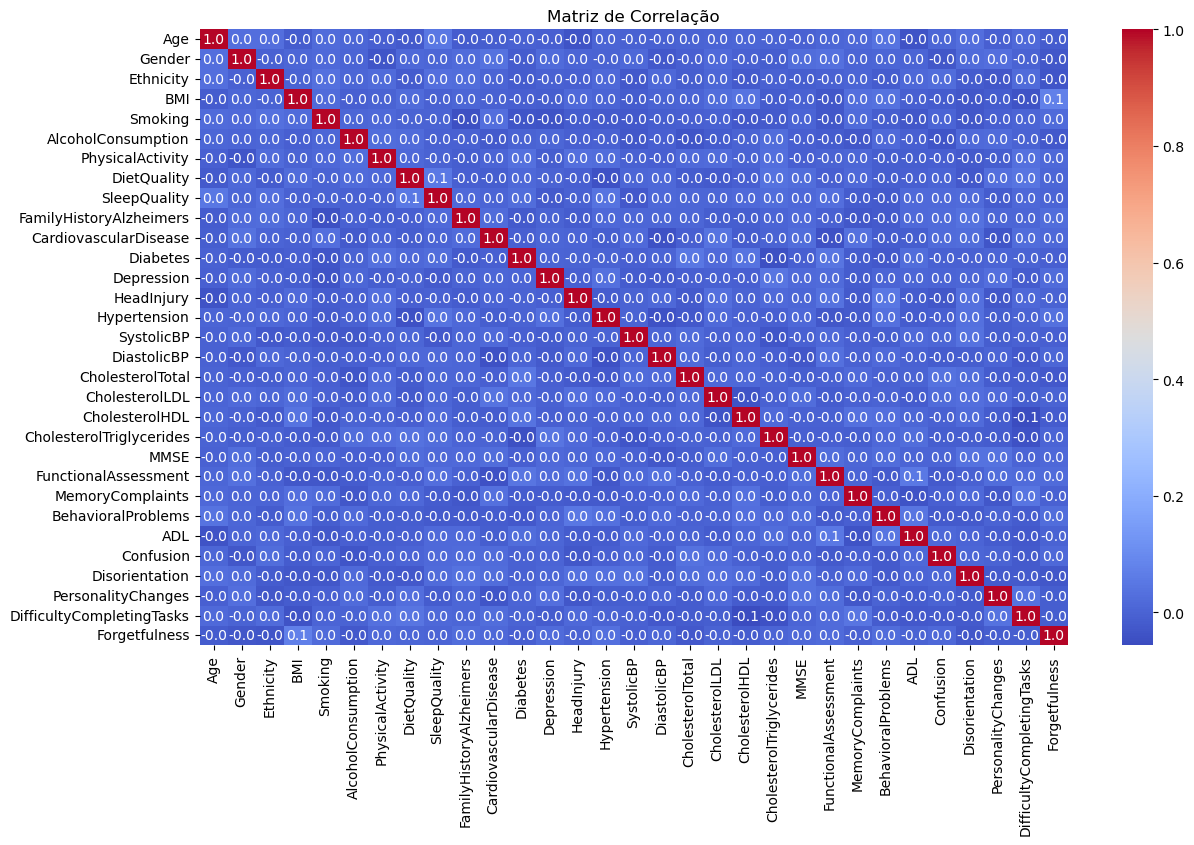

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning Data
columns_to_drops = ['DoctorInCharge', 'EducationLevel', 'PatientID', 'Diagnosis']
numeric_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality' ,'DietQuality', 'ADL', 'FunctionalAssessment', 'CholesterolTriglycerides', 'CholesterolHDL', 'CholesterolLDL', 'CholesterolTotal', 'DiastolicBP', 'SystolicBP']

# Calcular a matriz de correlação

# Remover as colunas 'EducationLevel' e 'DoctorInCharge' do conjunto de dados de treinamento
data_Alzheimer_cleaned = data_Alzheimer.drop(columns=columns_to_drops)
correlation_matrix = data_Alzheimer_cleaned.corr()

# Plotar usando Seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Matriz de Correlação")
plt.show()



In [6]:
from sklearn.model_selection import train_test_split

X_Alzheimer = data_Alzheimer_cleaned.copy()
y_Alzheimer = data_Alzheimer['Diagnosis']

X_train_alzheimer, X_test_alzheimer, y_train_alzheimer, y_test_alzheimer = train_test_split( X_Alzheimer, y_Alzheimer, test_size=0.2, random_state=42 )

X_train_alzheimer.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,87,1,2,27.764232,1,16.543170,0.281379,5.923418,7.836104,0,...,25.399206,3.085543,0,0,6.643693,0,0,0,0,0
630,70,0,0,37.098744,0,1.360202,9.242990,1.819284,5.218052,1,...,8.292136,5.616830,0,1,3.884562,0,0,0,0,1
78,82,1,3,15.908275,0,16.329031,1.915913,6.607292,6.146166,0,...,21.042238,3.662461,0,0,4.013722,0,0,1,1,0
366,76,1,0,30.302432,1,11.814030,6.281170,6.204349,6.825155,0,...,28.609438,4.648135,0,0,9.355700,1,0,1,0,1
1996,61,0,0,24.565357,1,2.273373,9.976581,2.057188,4.715534,0,...,2.629135,9.601238,1,0,8.818932,0,1,0,0,0


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_alzheimer, y_train_alzheimer)

# Aplicar Random Under Sampling para undersampling após SMOTE
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_smote, y_train_smote)

# print(y_train_alzheimer.value_counts())
# print(y_train_smote.value_counts())
# print(y_train_balanced.value_counts())

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Criar cópias para normalização

X_train_normalized_minmax = X_train_alzheimer.copy()
X_train_normalized_standard = X_train_alzheimer.copy()
X_train_normalized_robust = X_train_alzheimer.copy()

X_test_normalized_minmax = X_test_alzheimer.copy()
X_test_normalized_standard = X_test_alzheimer.copy()
X_test_normalized_robust = X_test_alzheimer.copy()

# X_train_normalized_minmax = X_train_smote.copy()
# X_train_normalized_standard = X_train_smote.copy()
# X_train_normalized_robust = X_train_smote.copy()

# X_test_normalized_minmax = X_test_alzheimer.copy()
# X_test_normalized_standard = X_test_alzheimer.copy()
# X_test_normalized_robust = X_test_alzheimer.copy()

# X_train_normalized_minmax = X_train_balanced.copy()
# X_train_normalized_standard = X_train_balanced.copy()
# X_train_normalized_robust = X_train_balanced.copy()

# X_test_normalized_minmax = X_test_alzheimer.copy()
# X_test_normalized_standard = X_test_alzheimer.copy()
# X_test_normalized_robust = X_test_alzheimer.copy()

# Normalização Min-Max
min_max_scaler = MinMaxScaler()
X_train_normalized_minmax[numeric_columns] = min_max_scaler.fit_transform(X_train_alzheimer[numeric_columns])
X_test_normalized_minmax[numeric_columns] = min_max_scaler.transform(X_test_alzheimer[numeric_columns])

# Normalização Z-Score
standard_scaler = StandardScaler()
X_train_normalized_standard[numeric_columns] = standard_scaler.fit_transform(X_train_alzheimer[numeric_columns])
X_test_normalized_standard[numeric_columns] = standard_scaler.transform(X_test_alzheimer[numeric_columns])

# Normalização Robust
robust_scaler = RobustScaler()
X_train_normalized_robust[numeric_columns] = robust_scaler.fit_transform(X_train_alzheimer[numeric_columns])
X_test_normalized_robust[numeric_columns] = robust_scaler.transform(X_test_alzheimer[numeric_columns])

# # Normalização Min-Max OVERSAMPLED
# min_max_scaler = MinMaxScaler()
# X_train_normalized_minmax[numeric_columns] = min_max_scaler.fit_transform(X_train_smote[numeric_columns])
# X_test_normalized_minmax[numeric_columns] = min_max_scaler.transform(X_test_alzheimer[numeric_columns])

# # Normalização Z-Score
# standard_scaler = StandardScaler()
# X_train_normalized_standard[numeric_columns] = standard_scaler.fit_transform(X_train_smote[numeric_columns])
# X_test_normalized_standard[numeric_columns] = standard_scaler.transform(X_test_alzheimer[numeric_columns])

# # Normalização Robust
# robust_scaler = RobustScaler()
# X_train_normalized_robust[numeric_columns] = robust_scaler.fit_transform(X_train_smote[numeric_columns])
# X_test_normalized_robust[numeric_columns] = robust_scaler.transform(X_test_alzheimer[numeric_columns])

# Normalização Min-Max OVERSAMPLED + UNDERSAMPLED
# min_max_scaler = MinMaxScaler()
# X_train_normalized_minmax[numeric_columns] = min_max_scaler.fit_transform(X_train_balanced[numeric_columns])
# X_test_normalized_minmax[numeric_columns] = min_max_scaler.transform(X_test_alzheimer[numeric_columns])

# # Normalização Z-Score
# standard_scaler = StandardScaler()
# X_train_normalized_standard[numeric_columns] = standard_scaler.fit_transform(X_train_balanced[numeric_columns])
# X_test_normalized_standard[numeric_columns] = standard_scaler.transform(X_test_alzheimer[numeric_columns])

# # Normalização Robust
# robust_scaler = RobustScaler()
# X_train_normalized_robust[numeric_columns] = robust_scaler.fit_transform(X_train_balanced[numeric_columns])
# X_test_normalized_robust[numeric_columns] = robust_scaler.transform(X_test_alzheimer[numeric_columns])



In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


####################################################################

## ARVORE DE DECISÃO ## 

# Inicializar o modelo com hiperparâmetros básicos
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

clf.fit(X_train_normalized_minmax, y_train_alzheimer)
# clf.fit(X_train_normalized_minmax, y_train_balanced) ## Normalizados + Over and Undersampled

y_pred = clf.predict(X_test_normalized_minmax)

# Evaluate accuracy
accuracy = accuracy_score(y_test_alzheimer, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred)
print(f'Classification Report:\n{class_report}')

# Accuracy: 0.9349
# Confusion Matrix:
# [[263  14]
#  [ 14 139]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.95      0.95      0.95       277
#            1       0.91      0.91      0.91       153

#     accuracy                           0.93       430
#    macro avg       0.93      0.93      0.93       430
# weighted avg       0.93      0.93      0.93       430

####################################################################

## LOGISTIC REGRESSION ##

model = LogisticRegression(max_iter=1000, solver='saga', penalty='l1' )

model.fit(X_train_normalized_minmax, y_train_alzheimer) ## Normalizados
# model.fit(X_train_normalized_minmax, y_train_smote) ## Normalizados OVERSAMPLED
# model.fit(X_train_normalized_minmax, y_train_balanced) ## Normalizados OVERSAMPLED + UNDERSAMPLED

y_pred_alzheimer = model.predict(X_test_normalized_minmax) ## Normalizados

# # Evaluate accuracy
# accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
# print(f'Accuracy: {accuracy:.4f}')

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
# print(f'Confusion Matrix:\n{conf_matrix}')

# # Classification report
# class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
# print(f'Classification Report:\n{class_report}')

# Accuracy: 0.8302 ( Normalized ) 
# Confusion Matrix:
# [[248  29]
#  [ 44 109]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.85      0.90      0.87       277
#            1       0.79      0.71      0.75       153

#     accuracy                           0.83       430
#    macro avg       0.82      0.80      0.81       430
# weighted avg       0.83      0.83      0.83       430

# Accuracy: 0.8233 ( Normalized + Oversampled + Undersampled )
# Confusion Matrix:
# [[229  48]
#  [ 28 125]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.89      0.83      0.86       277
#            1       0.72      0.82      0.77       153

#     accuracy                           0.82       430
#    macro avg       0.81      0.82      0.81       430
# weighted avg       0.83      0.82      0.83       430

# Accuracy: 0.8372
# Confusion Matrix: ( Normalized + Ajuste dos Parametros )
# [[257  20]
#  [ 50 103]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.84      0.93      0.88       277
#            1       0.84      0.67      0.75       153

#     accuracy                           0.84       430
#    macro avg       0.84      0.80      0.81       430
# weighted avg       0.84      0.84      0.83       430

Accuracy: 0.9302
Confusion Matrix:
[[267  10]
 [ 20 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       277
           1       0.93      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



In [19]:
from sklearn.model_selection import cross_val_score

# Validação cruzada no conjunto de treino
cv_scores = cross_val_score(clf, X_train_normalized_minmax, y_train_alzheimer , cv=5)
print(f"Validation Accuracy Scores: {cv_scores}")
print(f"Mean Validation Accuracy: {cv_scores.mean():.4f}")

Validation Accuracy Scores: [0.93023256 0.95348837 0.95348837 0.93604651 0.9212828 ]
Mean Validation Accuracy: 0.9389
